# Improving Computer Vision Accuracy using Convolutions
Course 1 - Week3

This code based over the code provided during the:

**Tensorflow in Practice** - Coursera Specialization.

Original code repo: https://github.com/lmoroney/dlaicourse

To maximize the learning all the notebooks will be modified to use different dataset by keeping the underling goals. Finally, the ultimate goal is to learn best practices in the usage of TF an not to obtain for each notebook the best possible model.

### Imports

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


### Load data

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Split training and test set - reshaping and scaling

The reshaping is needed since instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1 - input in a tensor format

In [3]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

### Define model

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

Compile and select optimizer

Note the output of the first layer is not 28X28 but 26X26 thats because to perform a 3X3 filter it is needed to have a padding of 2 pixel at the edges of the images

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Network architecture review:")
model.summary()

Network architecture review
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)             

### Train model

In [7]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4420 - accuracy: 0.8402
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8927
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2501 - accuracy: 0.9074
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2163 - accuracy: 0.9202
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1896 - accuracy: 0.9291


Evaluate model

In [8]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2652 - accuracy: 0.9041


### Explore convolutional filters

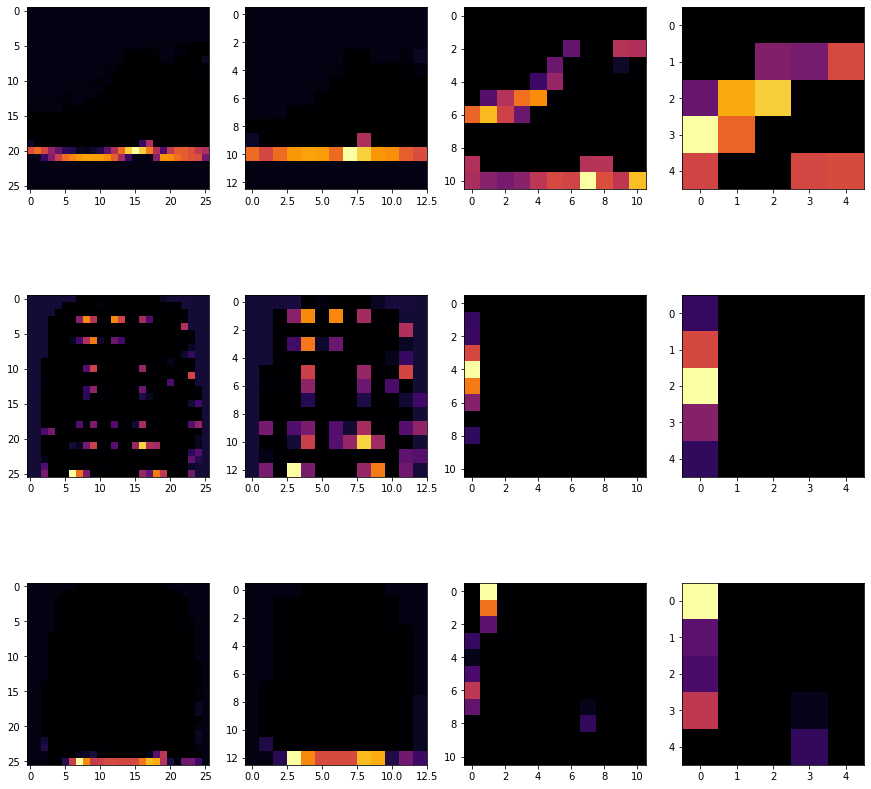

In [11]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4, figsize=(15, 15))
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1 # Filter observed
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4): # 4 levels of depth
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)